**Дан файл Renault.csv** с информацией по каждой марке

1. Разобрать файл Renault.csv и данные отобразить в виде массивов
2. Показать минимальную стоимость машины из массива
3. Показать самую высокую стоимость машины из массива
4. Просчитать средний пробег марки Renault Sandero I Stepway
5. Указать марку машины с самой изкой стоимостью
6. Указать пробег самой дешевой машины
7. Построить график зависимости стоимости машин от пробега
8. Построить диаграмму количества машин за каждый год из массива

In [29]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import pprint

plt.rcParams['figure.figsize'] = (15,10)


f = open(r"C:\Users\VikhlyantsevAA\Desktop\15. Программирование на языке Python. Уровень 4. Анализ и визуализация данных\Материалы с курса\Датасеты\Renault.csv", encoding = 'utf-8-sig')

numbers_of_line = len(f.readlines()) - 1
f.seek(0)

header = f.readline()

points = np.empty(numbers_of_line, dtype=np.uint32)
mileages = np.empty(numbers_of_line, dtype=np.uint64)
models = np.empty(numbers_of_line, dtype=(str, 37))
prices = np.empty_like(mileages)
years = np.empty(numbers_of_line, dtype=np.uint32)
gearboxes = np.empty(numbers_of_line, dtype=(str, 10))
truckbodys = np.empty(numbers_of_line, dtype=(str, 15))
transmissions = np.empty(numbers_of_line, dtype=(str,15))
colors = np.empty(numbers_of_line, dtype=(str, 15))
engines = np.empty(numbers_of_line, dtype=(str, 30))


data = csv.reader(f, delimiter = ';')


for i, row in enumerate(data):
    point = row[0]
    mileage = int(row[1].replace("км", "" ).replace("Новый", "0").replace(" ", ""))
    model = row[2]
    price = int(row[3].replace("₽", "").replace("от", "").replace(" ", ""))
    year = int(row[4])
    gearbox = row[5]
    truckbody = row[6]
    transmission = row[7]
    color = row[8]
    engine = row[9]
    
    
    points[i] = point
    mileages[i] = mileage
    models[i] = model
    prices[i] = price
    years[i] = year
    gearboxes[i] = gearbox
    truckbodys[i] = truckbody
    transmissions[i] = transmission
    colors[i] = color
    engines[i] = engine
    
    
    
print(points)
print(mileages)
print(models)
print(prices)
print(years)
print(gearboxes) 
print(truckbodys)
print(transmissions) 
print(colors )
print(engines)

[   0    1    2 ... 3216 3217 3218]
[107500 137327  12016 ...  50000 165000 199000]
['Renault Sandero II' 'Renault Sandero I' 'Renault Sandero II Stepway' ...
 'Renault Sandero II Stepway' 'Renault Sandero I' 'Renault Sandero I']
[585000 412502 755000 ... 650000 350000 265000]
[2015 2013 2017 ... 2016 2012 2012]
['механика' 'механика' 'автомат' ... 'механика' 'механика' 'механика']
['хэтчбек 5 дв.' 'хэтчбек 5 дв.' 'хэтчбек 5 дв.' ... 'хэтчбек 5 дв.'
 'хэтчбек 5 дв.' 'хэтчбек 5 дв.']
['передний' 'передний' 'передний' ... 'передний' 'передний' 'передний']
['золотистый' 'чёрный' 'чёрный' ... 'бежевый' 'чёрный' 'бежевый']
['1.6 л/82л.с./Бензин' '1.4 л/75л.с./Бензин' '1.6 л/102л.с./Бензин' ...
 '1.6 л/102л.с./Бензин' '1.6 л/84л.с./Бензин' '1.4 л/75л.с./Бензин']


In [30]:
# Минимальная стоимость Рено в массиве:

prices.min()

180000

In [31]:
# Максимальная стоимость Рено в массиве:

prices.max()

1129000

In [24]:
# Просчитать средний пробег марки Renault Sandero I Stepway

stepway_i_mask = (models == 'Renault Sandero I Stepway') # Маска из конкретной модели
(mileages[stepway_i_mask]).mean()

107661.02721088435

In [25]:
idx_min = prices.argmin() # Индекс с самой низкой стоимостью

# Марка машины с самой низкой стоимостью
cheapest_model = models[idx_min]
print(cheapest_model)

# Пробег самой дешевой машины
mileage_cheapmod = mileages[idx_min]
print(mileage_cheapmod)

Renault Sandero I
290000


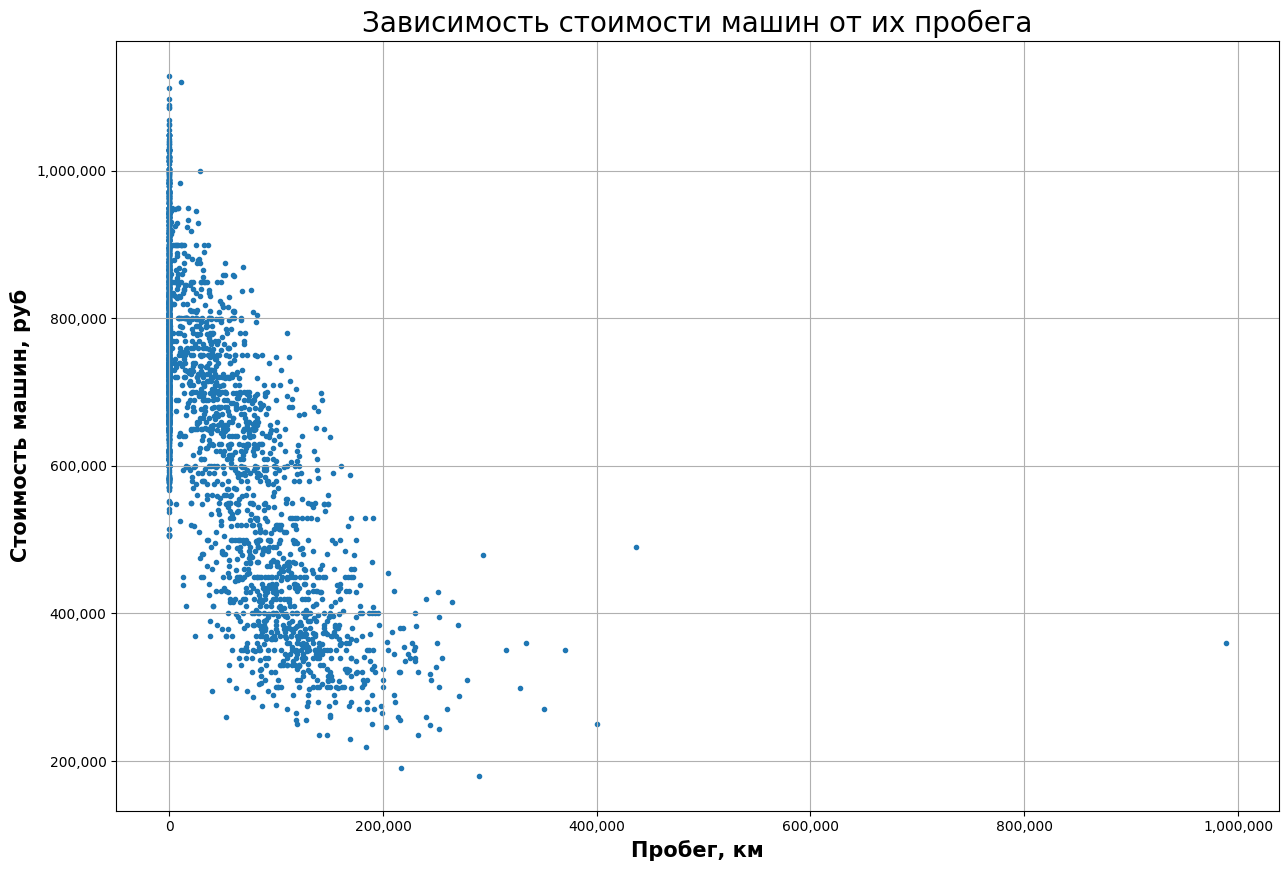

In [26]:
plt.scatter(mileages, prices, marker='.')
plt.title('Зависимость стоимости машин от их пробега', fontsize=20)
plt.xlabel('Пробег, км', fontweight='bold', fontsize=15)
plt.ylabel('Стоимость машин, руб', fontweight='bold', fontsize=15)
plt.xticks([0, 200_000, 400_000, 600_000, 800_000, 1_000_000])
plt.yticks([200_000, 400_000, 600_000, 800_000, 1_000_000])

ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.grid()
plt.show()

По графику видно, что у нас есть определнно запвисимость корреляционная отрицательная: при увеличении пробега, стоимость машин уменьшается 

In [33]:
# Построить диаграмму с количеством авто каждого года

from collections import Counter
year_counts = Counter(years)
pprint.pprint(year_counts)



Counter({2021: 1154,
         2020: 564,
         2012: 181,
         2017: 178,
         2018: 175,
         2015: 164,
         2011: 164,
         2016: 156,
         2014: 148,
         2013: 140,
         2019: 113,
         2010: 81,
         2009: 1})


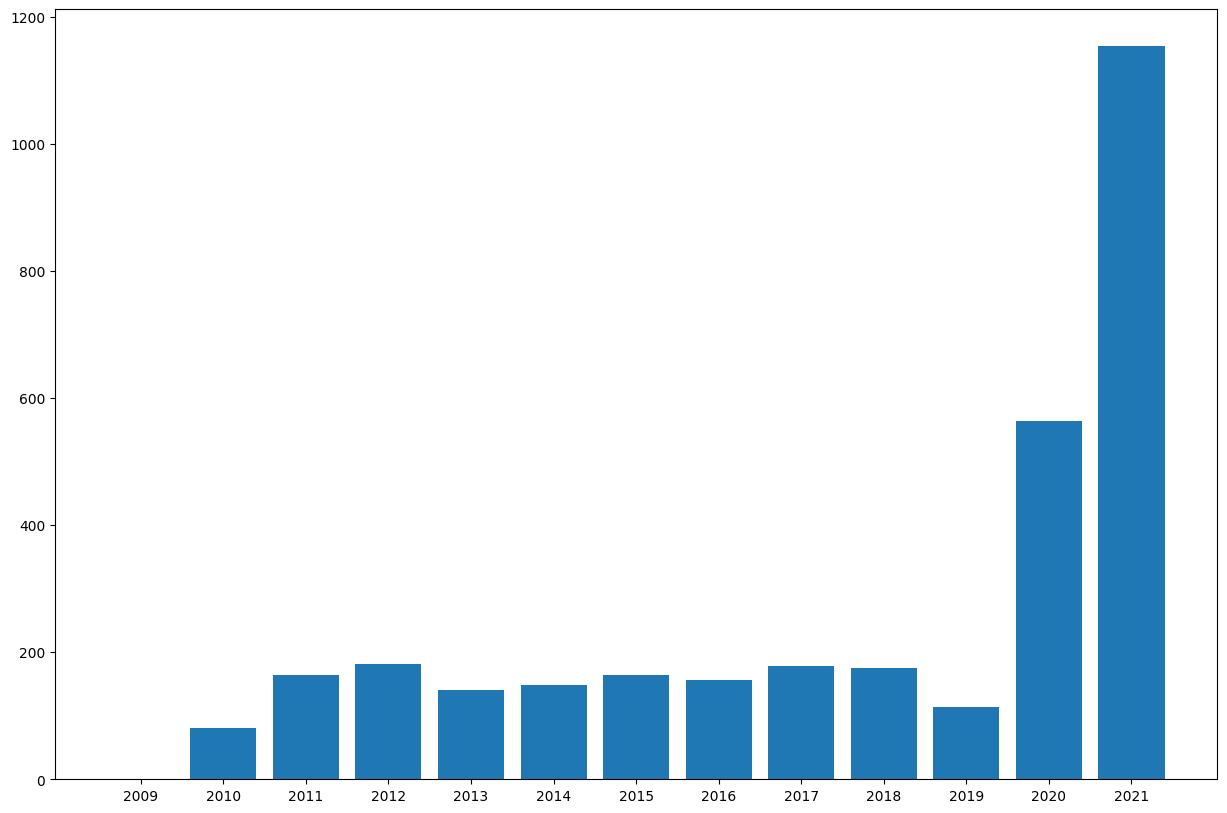

In [40]:
plt.bar(year_counts.keys(), year_counts.values(), tick_label=list(year_counts.keys()))

plt.show()